In [1]:
'''
Reading basic data from iphone inputs
'''

'\nReading basic data from iphone inputs\n'

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import datetime
import os
import sys
from operator import itemgetter
import random
from optparse import OptionParser
from copy import copy
import numpy as np
from scipy.stats import kstest, mstats
import string
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import matplotlib.colors as colors
import matplotlib.cm as cmx

# import pymc as pm


In [13]:
file_name = '../../data/iphone_responses/backend_patientresponse.csv'
dtypes = [int, datetime, string, datetime, string, int, int]

In [16]:
df = pd.read_csv(file_name, parse_dates=['workday', 'date'])
#start on August 1st
# df = df[478:]
df=df[3000:]
#get rid of admin users
# admin_list = ['admin', 'anna', 'john', 'memorial', 'nm175316', '[mbechel']
admin_list= [2,3,4,5,7,8]
df = df[~df.user_id.isin(admin_list)]
df

,id,question_id,workday,response,date,patient_id,checklist_id,user_id
3000,3013,0401,2016-10-13,N,2016-10-13 13:32:15,22c51d2d02cdfadc81ee723f57bac3083f972b0b,1,58
3001,3014,0501,2016-10-13,Y,2016-10-13 13:32:17,22c51d2d02cdfadc81ee723f57bac3083f972b0b,1,58
3002,3015,0601,2016-10-13,N,2016-10-13 13:40:58,22c51d2d02cdfadc81ee723f57bac3083f972b0b,1,58
3003,3016,0301,2016-10-13,N,2016-10-13 13:40:54,22c51d2d02cdfadc81ee723f57bac3083f972b0b,1,58
3004,3017,0601,2016-10-13,N,2016-10-13 13:57:43,f0de3bc265f9bc9039e5c65c5bf8050de30f9e32,1,58
3005,3018,0701,2016-10-13,Y,2016-10-13 13:57:47,f0de3bc265f9bc9039e5c65c5bf8050de30f9e32,1,58
3006,3019,0702,2016-10-13,Y,2016-10-13 13:57:49,f0de3bc265f9bc9039e5c65c5bf8050de30f9e32,1,58
3007,3020,0301,2016-10-13,N,2016-10-13 13:57:54,f0de3bc265f9bc9039e5c65c5bf8050de30f9e32,1,58
3008,3021,0401,2016-10-13,N,2016-10-13 13:57:55,f0de3bc265f9bc9039e5c65c5bf8050de30f9e32,1,58
3009,3022,0501,2016-10-13,N,2016-10-13 13:57:56,f0de3bc265f9bc9039e5c65c5bf8050de30f9e32,1,58


In [17]:
doctor_id = df.user_id.unique().tolist()
doctor_id

[58, 54, 20, 16, 21]

In [18]:
doctor_count = {} #count number of inputs per doctor
count = 0
for doc in df.user_id.tolist():
    if doc not in doctor_count:
        doctor_count[doc] = 1
        count += 1
    else:
        doctor_count[doc] += 1
        count += 1
doctor_count
# print(df.count, count)

{16: 31, 20: 77, 21: 11, 54: 88, 58: 547}

In [19]:
date_dict = {}
for date in df.workday:
    workday = {}
    for user_id in df.user_id[df.workday == date]:
        if user_id not in workday:
            workday[user_id] = 1
        else:
            workday[user_id] += 1
    date_dict[date] = workday


In [20]:
#annonimizing doctor ids
annoni_dict = {}
date_dict2 = copy(date_dict)
for date_key, dict_val in date_dict2.items():
    annoni_id = ['A','B','C','D','E','F']
    new_dict = {}
    for i in range(len(dict_val.keys())):
        new_dict[annoni_id[i]] = dict_val[list(dict_val.keys())[i]]
    annoni_dict[date_key] = new_dict


In [21]:
dates = sorted(list(annoni_dict.keys()))
start = dates[0].to_datetime()
end = dates[-1].to_datetime()
days = (end-start).days + 1

date_list = [start + datetime.timedelta(days=x) for x in range(0, days)]
# print(date_list)
columns = ['A', 'B', 'C']

df_docpatient = pd.DataFrame(0, index=date_list, columns=columns)
for index, val in annoni_dict.items():
    for col in val:
        df_docpatient[col][index] = annoni_dict[index][col]
# df_docpatient['A'][pd.Timestamp('2016-08-19 00:00:00')]

In [22]:
df_docpatient[0:]

,A,B,C
2016-10-13,17,0,0
2016-10-14,23,0,0
2016-10-15,0,0,0
2016-10-16,0,0,0
2016-10-17,0,0,0
2016-10-18,0,0,0
2016-10-19,0,0,0
2016-10-20,0,0,0
2016-10-21,0,0,0
2016-10-22,0,0,0


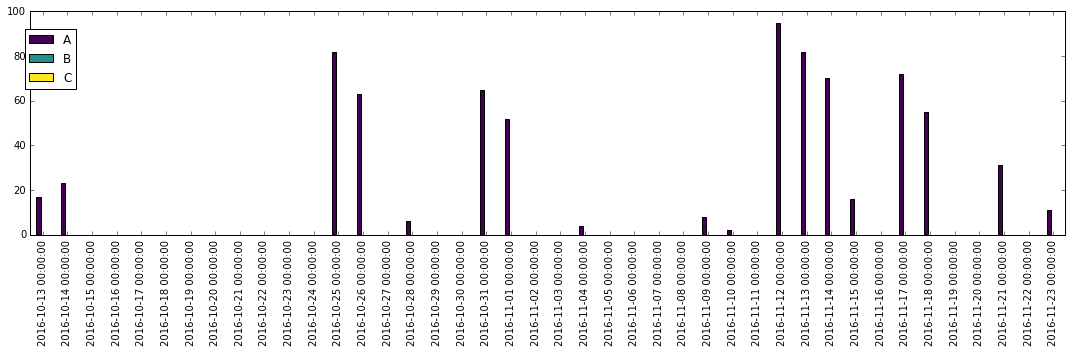

In [23]:

ax = df_docpatient.plot(kind='bar', figsize=(15, 5), colormap=cmx.viridis, legend=True)
ax.legend(loc='upper right', bbox_to_anchor=(0.05, 0.95))
plt.tight_layout()
plt.savefig('../../result/iphoneapp/daily_per_doctor_closer_120516.png', transparent=True)